In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = [0.5, 1.0],
        m_rate = [0.5, 1.0],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5],
        scale_hyperparameter = False,
        regularizer = l2_regularizer))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    itr = century + breakpoint
    '''
    model.optimizer.rr = model.optimizer.rr * 0.9
    model.optimizer.gf = model.optimizer.gf * 0.9
    model.optimizer.crossover_rate = model.optimizer.crossover_rate * 0.9
    model.optimizer.mutation_rate = model.optimizer.mutation_rate * 1.1
    '''
    model.optimizer.rr = model.optimizer.radioactive_rating[1] - (model.optimizer.radioactive_rating[1] - model.optimizer.radioactive_rating[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.gf = model.optimizer.grow_factor[1] - (model.optimizer.grow_factor[1] - model.optimizer.grow_factor[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.crossover_rate = model.optimizer.x_rate[1] - (model.optimizer.x_rate[1] - model.optimizer.x_rate[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.mutation_rate = model.optimizer.m_rate[0] + (model.optimizer.m_rate[1] - model.optimizer.m_rate[0]) / EPOCHS * (EPOCHS - itr)
    

C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)
C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=Fal

Checkpoint 100, Accuracy: 0.9012345679012346, Loss: 0.507370736863878
Checkpoint 200, Accuracy: 0.9012345679012346, Loss: 0.44624625311957467
Checkpoint 300, Accuracy: 0.9382716049382716, Loss: 0.40255829139992044
Checkpoint 400, Accuracy: 0.9444444444444444, Loss: 0.3779613353587963
Checkpoint 500, Accuracy: 0.9444444444444444, Loss: 0.3852871435659903


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.4476245  0.51434886 0.03802662]
[1. 0. 0.] <-> [0.6696316  0.08343843 0.24692996]
[1. 0. 0.] <-> [0.7275614  0.18419756 0.088241  ]
[1. 0. 0.] <-> [0.77212733 0.07957373 0.14829902]
[1. 0. 0.] <-> [0.7888221  0.11121894 0.09995891]
[0. 0. 1.] <-> [0.59057325 0.07421131 0.3352154 ]
[1. 0. 0.] <-> [0.7483479  0.13064943 0.1210027 ]
[1. 0. 0.] <-> [0.73327786 0.09490502 0.17181705]
[1. 0. 0.] <-> [0.8035144  0.09929649 0.09718905]
[1. 0. 0.] <-> [0.7275599  0.19332008 0.07912005]
[0. 0. 1.] <-> [0.21734953 0.03905606 0.74359447]
[1. 0. 0.] <-> [0.75964016 0.10794052 0.13241933]
[1. 0. 0.] <-> [0.79540163 0.08276932 0.121829  ]
[1. 0. 0.] <-> [0.75721437 0.10353772 0.13924794]
[1. 0. 0.] <-> [0.74484366 0.13549888 0.11965743]
[0. 1. 0.] <-> [0.2257264 0.7488178 0.0254558]
[1. 0. 0.] <-> [0.7512563  0.14214031 0.10660344]
[1. 0. 0.] <-> [0.728205   0.13623068 0.1355643 ]
[1. 0. 0.] <-> [0.7809978  0.09898366 0.12001847]
[1. 0. 0.] <-> [0.75248426 0.0857123  0.16180342]
[0.

In [12]:
# Testing Performance

C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


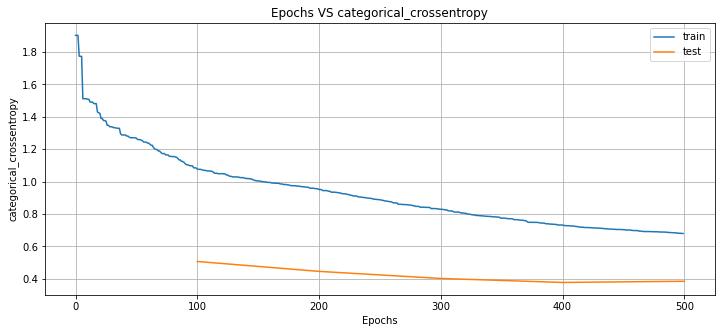

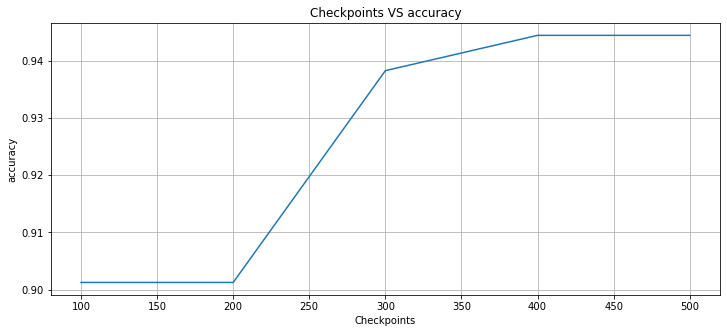

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9012345679012346, 'mean_square_error': 0.2698143150950617, 'categorical_crossentropy': 0.507370736863878, 'precision': 0.8518518518518519, 'recall': 0.8518518518518519, 'f1': 0.8518518518518519, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 16, 'tn_hit': 12, 'fn_hit': 0}, 1: {'tp_hit': 8, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 7}, 2: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 9}}, 'checkpoint': 100} 


{'accuracy': 0.9012345679012346, 'mean_square_error': 0.23160026086593724, 'categorical_crossentropy': 0.44624625311957467, 'precision': 0.8518518518518519, 'recall': 0.8518518518518519, 'f1': 0.8518518518518519, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 16, 'tn_hit': 12, 'fn_hit': 0}, 1: {'tp_hit': 7, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 8}, 2: {'tp_hit': 5, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 8}}, 'checkpoint': 200} 


{'accuracy': 0.9382716049382716, 'mean_square_error': 0.1983295686764547, 'categorical_crossentropy': 0.40255829139992044, 'precision':

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-0.6068388   1.495367    0.5462905   0.11767282 -0.45829335]
 bias: -1.0762418508529663

Neuron 1: weights:
[-0.45102757  0.5642881   0.08723852 -0.30195075 -0.13155754]
 bias: -0.011318153701722622

Neuron 2: weights:
[0.10494643 0.24587338 0.76631737 0.70068496 0.41304377]
 bias: -0.16111308336257935

Neuron 3: weights:
[ 0.30088428 -0.6816743  -0.3318107   0.8545468   1.0386344 ]
 bias: -1.2869229316711426

$
Layer 2
Neuron 0: weights:
[-1.3734503   0.31551635 -0.63846076 -1.2902694 ]
 bias: 1.951347827911377

Neuron 1: weights:
[ 1.4716814   0.8115935   0.4536378  -0.94590855]
 bias: -1.0573114156723022

Neuron 2: weights:
[-1.2980031  -0.5499234   0.39290848  1.6063052 ]
 bias: -0.46154260635375977

$

